Analysis on knn vs real-measure

In [69]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import shutil

In [71]:
mm1 = 200
mm2 = 200
a0 = 0.0
a1 = -1.0
b0 = 0.3
b1 = 0.5
b = np.arange(a0, a1, (a1-a0)/mm1)
d = np.arange(b0, b1, (b1-b0)/mm2)
B, D = np.meshgrid(b, d)
n, m = B.shape

In [73]:
nexp = 14
xyz = np.zeros((nexp, 200, 200))
for jter in range(nexp):
    fname_accum = '/Users/namkim/testAI/data_iv/data_' + str(jter+1) + '.txt'
    #fname_accum = 'data_iv_' + str(jter+1) + '.txt'
    x = []
    y = []
    z = []
    afile = open(fname_accum, 'r')
    for line in afile:
        y.append(float(line.split()[0]))
        x.append(float(line.split()[1]))
        z.append(float(line.split()[2]))
    afile.close()
    z = np.array(z)
    x = np.array(x)
    y = np.array(y)
    xx = np.zeros((200, 200))
    yy = np.zeros((200, 200))
    zz = np.zeros((200, 200))
    k = 0
    for i in range(200):
        for j in range(200):
            xx[i, j] = x[k]
            yy[i, j] = y[k]
            zz[i, j] = z[k]
            k = k+1
    if False:
        print(len(z))
    #xyz[jter, :, :] = xx[:, :]
    #xyz[jter, :, :] = yy[:, :]
    xyz[jter, :, :] = zz[:, :]
print("모든 층의 처음 3x7 부분:")
print(xyz[:, :3, :7])

모든 층의 처음 3x7 부분:
[[[-3.334599 -3.241232 -3.166598 -3.096369 -3.029724 -2.973589 -2.912946]
  [-3.274464 -3.188219 -3.113031 -3.056264 -2.994141 -2.934186 -2.879709]
  [-3.272013 -3.186276 -3.111317 -3.053163 -2.996077 -2.944654 -2.886991]]

 [[-2.667261 -2.655575 -2.629685 -2.601225 -2.569541 -2.539839 -2.509596]
  [-3.340095 -3.258756 -3.187943 -3.119616 -3.059262 -2.994106 -2.939891]
  [-3.331694 -3.264866 -3.190981 -3.126375 -3.060122 -2.998822 -2.943386]]

 [[-2.634947 -2.616372 -2.594528 -2.563383 -2.536249 -2.50732  -2.479257]
  [-3.372742 -3.280544 -3.207154 -3.139157 -3.083756 -3.020262 -2.965366]
  [-3.338941 -3.246294 -3.195502 -3.12813  -3.064921 -3.004148 -2.965727]]

 [[-2.75286  -2.726316 -2.691454 -2.657416 -2.627036 -2.59182  -2.561879]
  [-3.339629 -3.250413 -3.183272 -3.117383 -3.065375 -3.015234 -2.97092 ]
  [-3.341288 -3.264158 -3.189824 -3.122931 -3.056032 -2.997187 -2.945118]]

 [[-2.942942 -2.90538  -2.863258 -2.819038 -2.767687 -2.745113 -2.697211]
  [-3.232437 

In [75]:
mm1 = 200
mm2 = 200
a0 = 0.0
a1 = -1.0
b0 = 0.3
b1 = 0.5
b = np.arange(a0, a1, (a1-a0)/mm1)
d = np.arange(b0, b1, (b1-b0)/mm2)
B, D = np.meshgrid(b, d)
n, m = B.shape

surface_IV measure, default


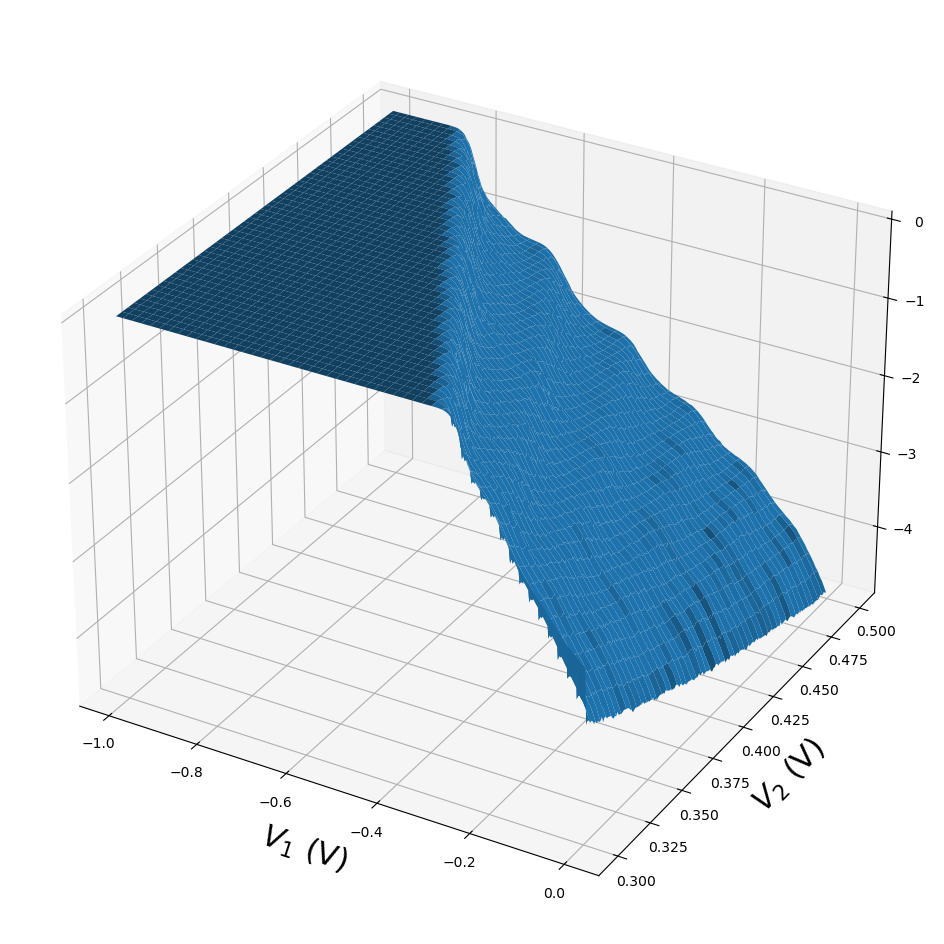

surface_IV measure, 10elev 100azim


surface_IV measure, 15elev 120azim


contour_surface_IV measure


contour_rf_surface_IV measure
-4.794006 0.000525
-4.794006 0.000525


In [128]:

print('surface_IV measure, default')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, xyz[2,:,:])
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('Current (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_iv-measure_surface' + str() + '.pdf')
plt.show()
plt.close()

print('surface_IV measure, 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, xyz[2,:,:])
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('Current (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_iv_surface_10elev 100azim' + str() + '.pdf')
plt.show()
plt.close()

print('surface_IV measure, 15elev 120azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, xyz[2,:,:])
ax.view_init(elev=15., azim=120.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('Current (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_iv_surface_15elev120azim' + str() + '.pdf')
plt.show()
plt.close()


print('contour_surface_IV measure')
fig, ax = plt.subplots()
CS = ax.contour(B, D, xyz[2,:,:])
ax.clabel(CS, inline=True, fontsize=10)
ax.set_aspect('equal', 'box')
#ax.set_title('Simplest default with labels')
plt.tight_layout()
plt.savefig('fig_iv_contour_' + str(2) + '.pdf')
plt.show()
plt.close()

print('contour_rf_surface_IV measure')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
amax = np.max(xyz[2,:,:])
amin = np.min(xyz[2,:,:])
print(amin, amax)
tmz = (amax-amin)/10.
ax1.contourf(xyz[2,:,:], levels=np.arange(amin, amax, tmz),
             extend='both', origin="lower")
amax = np.max(xyz[2,:,:])
amin = np.min(xyz[2,:,:])
print(amin, amax)
# tmz = (amax-amin)/10.
# ax2.contourf(st, levels=np.arange(amin, amax, tmz),
#              extend='both', origin="lower")
plt.savefig('fig_iv-contour' + str() + '.pdf')
# plt.show()
# plt.close()
# end = time.time()
# print(end - start, (end-start)/60.)


In [79]:
print('xyz array (first 3 rows x 7 columns for all layers):')
print(xyz[:, :3, :7])

# Create array for averages
zavgexpij = np.zeros((200, 200))  # 2D array since we're averaging across experiments
nexp = 14

# Calculate average using sum()
for i in range(200):
    for j in range(200):
        zavgexpij[i, j] = sum(xyz[:, i, j])/nexp  # Using sum() instead of np.mean()

print('\nzavgexpij array (first 3 rows x 4 columns):')
print(zavgexpij[:3, :4])


print('surface_zavgexp, 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, zavgexpij[:, :])
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('<Current> (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_zavgexp' + str() + '.pdf')
plt.show()
plt.close()

xyz array (first 3 rows x 7 columns for all layers):
[[[-3.334599 -3.241232 -3.166598 -3.096369 -3.029724 -2.973589 -2.912946]
  [-3.274464 -3.188219 -3.113031 -3.056264 -2.994141 -2.934186 -2.879709]
  [-3.272013 -3.186276 -3.111317 -3.053163 -2.996077 -2.944654 -2.886991]]

 [[-2.667261 -2.655575 -2.629685 -2.601225 -2.569541 -2.539839 -2.509596]
  [-3.340095 -3.258756 -3.187943 -3.119616 -3.059262 -2.994106 -2.939891]
  [-3.331694 -3.264866 -3.190981 -3.126375 -3.060122 -2.998822 -2.943386]]

 [[-2.634947 -2.616372 -2.594528 -2.563383 -2.536249 -2.50732  -2.479257]
  [-3.372742 -3.280544 -3.207154 -3.139157 -3.083756 -3.020262 -2.965366]
  [-3.338941 -3.246294 -3.195502 -3.12813  -3.064921 -3.004148 -2.965727]]

 [[-2.75286  -2.726316 -2.691454 -2.657416 -2.627036 -2.59182  -2.561879]
  [-3.339629 -3.250413 -3.183272 -3.117383 -3.065375 -3.015234 -2.97092 ]
  [-3.341288 -3.264158 -3.189824 -3.122931 -3.056032 -2.997187 -2.945118]]

 [[-2.942942 -2.90538  -2.863258 -2.819038 -2.76768

In [83]:
tmp = np.zeros((nexp, 200, 200))
for iexp in range(nexp):
    tmp[iexp, :, :] = (xyz[iexp, :, :]-zavgexpij[:, :])**2
print('tmp[:, :3, :4]')
print(tmp[:, :3, :4])
varexpij = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        varexpij[i, j] = sum(tmp[:, i, j])/nexp
print('varexpij[:3, :4]')
print(varexpij[:3, :4])

tmp[:, :3, :4]
[[[1.86936034e-01 1.41460613e-01 1.17703494e-01 9.89633627e-02]
  [5.52813493e-05 2.79236755e-05 1.92634572e-06 2.18409346e-05]
  [1.06882291e-05 9.64744903e-05 2.04020413e-04 4.75351152e-05]]

 [[5.52141905e-02 4.39088975e-02 3.75714534e-02 3.26017588e-02]
  [5.33866123e-03 5.74886737e-03 5.40578908e-03 4.62745893e-03]
  [3.18228151e-03 4.72901818e-03 4.27460044e-03 4.39800133e-03]]

 [[7.14444787e-02 6.18753188e-02 5.24366818e-02 4.76992464e-02]
  [1.11752686e-02 9.52757266e-03 8.59979347e-03 7.66787941e-03]
  [4.05243190e-03 2.51962407e-03 4.88620972e-03 4.63385553e-03]]

 [[2.23137869e-02 1.92664116e-02 1.74410510e-02 1.54675416e-02]
  [5.27078074e-03 4.55331904e-03 4.74074545e-03 4.32864366e-03]
  [4.35675432e-03 4.63214415e-03 4.12464878e-03 3.95306802e-03]]

 [[1.65681562e-03 1.62090786e-03 1.57922218e-03 1.38781794e-03]
  [1.19659658e-03 1.44276255e-03 1.65290453e-03 1.88882127e-03]
  [1.84550023e-03 2.18193087e-03 1.87719179e-03 1.56614670e-03]]

 [[2.19836964e-

In [87]:
nexp=14
tmp = np.zeros((nexp, 200, 200))
for iexp in range(3):
    tmp[iexp, :, :] = ((xyz[iexp, :, :]-zavgexpij[:, :]))**2
savgexpij = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        savgexpij[i, j] = np.sqrt(sum(tmp[:, i, j])/nexp)
print('savgexpij[[:3,:4]')
print(savgexpij[:3,:4])
print('savgexpij[197:199,197:199]')
print(savgexpij[197:199,197:199])

savgexpij[[:3,:4]
[[0.14966503 0.13289223 0.12180536 0.1131574 ]
 [0.03440225 0.0330631  0.03163126 0.0296614 ]
 [0.02274926 0.02290527 0.02586342 0.02546621]]
savgexpij[197:199,197:199]
[[2.17794404e-06 2.31068945e-06]
 [2.90796634e-06 9.58885103e-07]]


standard deviation (savgexpij), default


standard deviation (savgexpij), 10elev 100azim


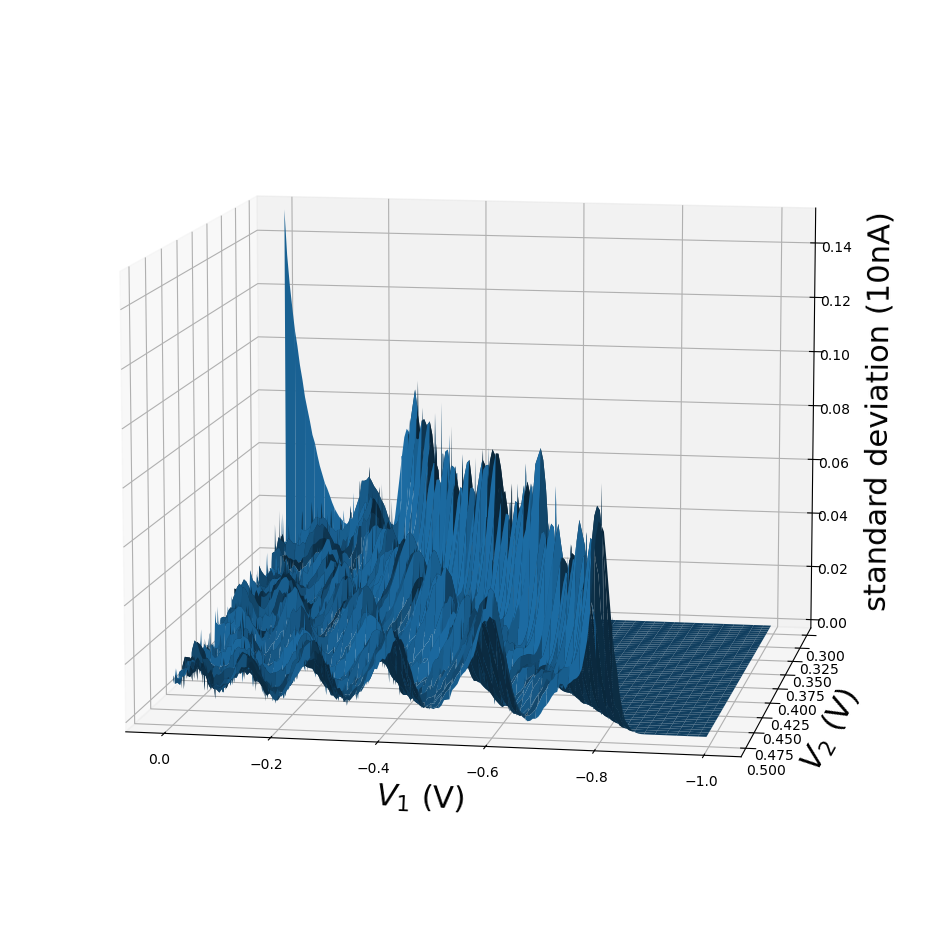

contour_rf
9.919501068990072e-08 0.14966503158983302
9.919501068990072e-08 0.14966503158983302


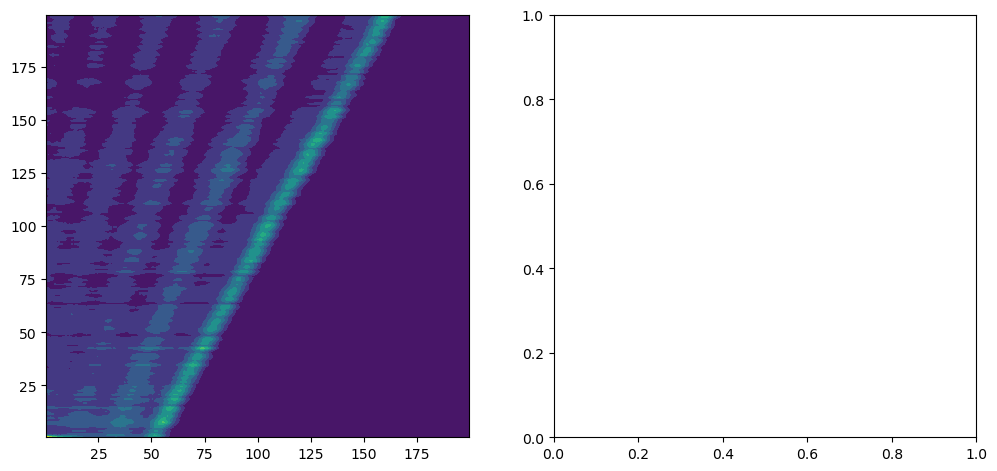

In [130]:
print('standard deviation (savgexpij), default')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, savgexpij)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_sdev_' + str() + '.pdf')
plt.show()
plt.close()

print('standard deviation (savgexpij), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, savgexpij)
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_sdev2_10elev 100azim' + str() + '.pdf')
plt.show()
plt.close()


print('contour_rf')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
amax = np.max(savgexpij)
amin = np.min(savgexpij)
print(amin, amax)
tmz = (amax-amin)/10.
ax1.contourf(savgexpij, levels=np.arange(amin, amax, tmz),
             extend='both', origin="lower")
amax = np.max(savgexpij)
amin = np.min(savgexpij)
print(amin, amax)
# tmz = (amax-amin)/10.
# ax2.contourf(st, levels=np.arange(amin, amax, tmz),
#              extend='both', origin="lower")
plt.savefig('fig_sdev_contour_' + str() + '.pdf')
# plt.show()
# plt.close()
# end = time.time()
# print(end - start, (end-start)/60.)

In [95]:
nuarray = np.zeros((20, 200, 200))
#for iexp in range(nexp):
for jter in range(20):
    fname_accum = r'/Users/namkim/testAI/data_knn(ts=0.3)/accum_'+str(jter)+'.npy'
    with open(fname_accum, 'rb') as afile:  #저장된 방식에 따라서 오픈해야함
        nu = np.load(afile)
        st = np.load(afile)
        nuarray[jter, :, :] = nu[:, :]
print('nuarray[1, :3, :4]')
print(nuarray[1, :3, :4])
print('nuarray[2, :3, :4]')
print(nuarray[2, :3, :4])
print('nuarray[19, :3, :4]')
print(nuarray[19, :3, :4])

nuarray[1, :3, :4]
[[-3.38768834 -3.20902842 -2.92328648 -2.74794519]
 [-3.37899262 -3.21113399 -2.94404395 -2.79550348]
 [-3.3846469  -3.24691303 -2.97015785 -2.79558202]]
nuarray[2, :3, :4]
[[-3.39328047 -3.23753534 -2.96151595 -2.72789532]
 [-3.40547633 -3.23961994 -2.97497948 -2.78646137]
 [-3.46971927 -3.27091844 -3.00460043 -2.78743639]]
nuarray[19, :3, :4]
[[-3.54056686 -3.31530947 -3.00157317 -2.84945202]
 [-3.50572824 -3.31719674 -3.02292423 -2.89160265]
 [-3.49754173 -3.35488594 -3.04509836 -2.88950932]]


surface_kNN_0.3ts(nuarray[19, :, :]), default


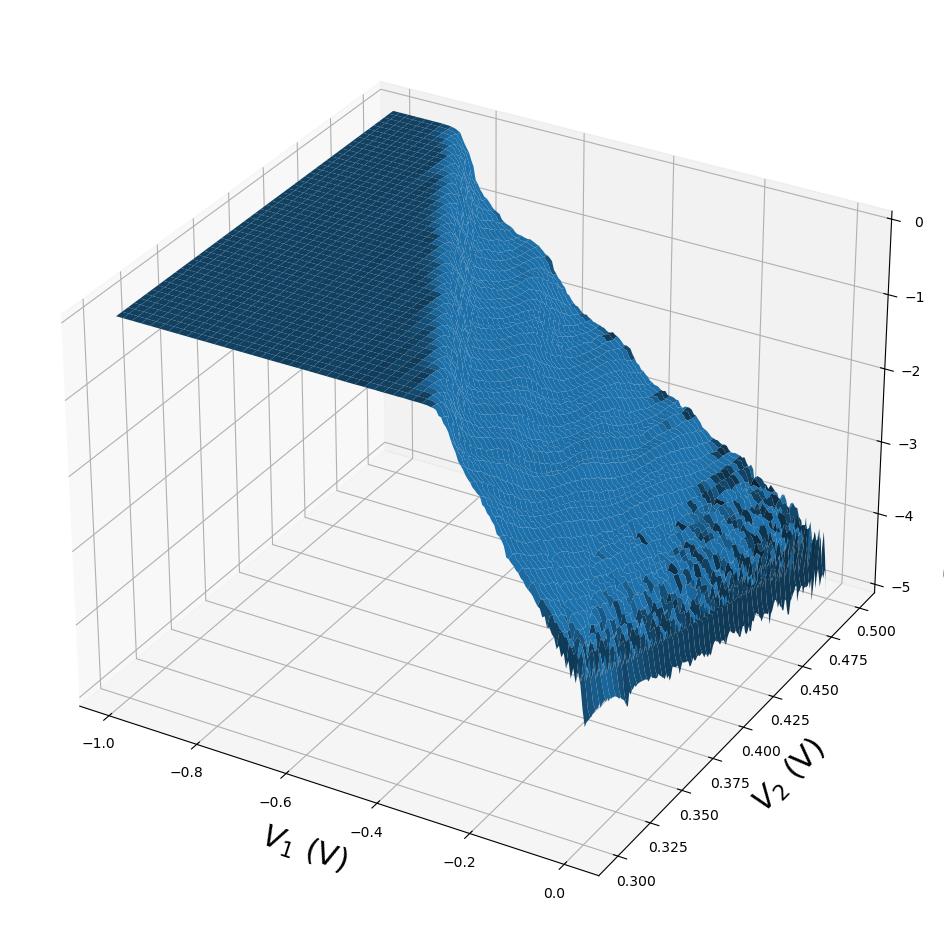

surface_kNN_0.3ts (nuarray[19, :, :]), 10elev 100azim


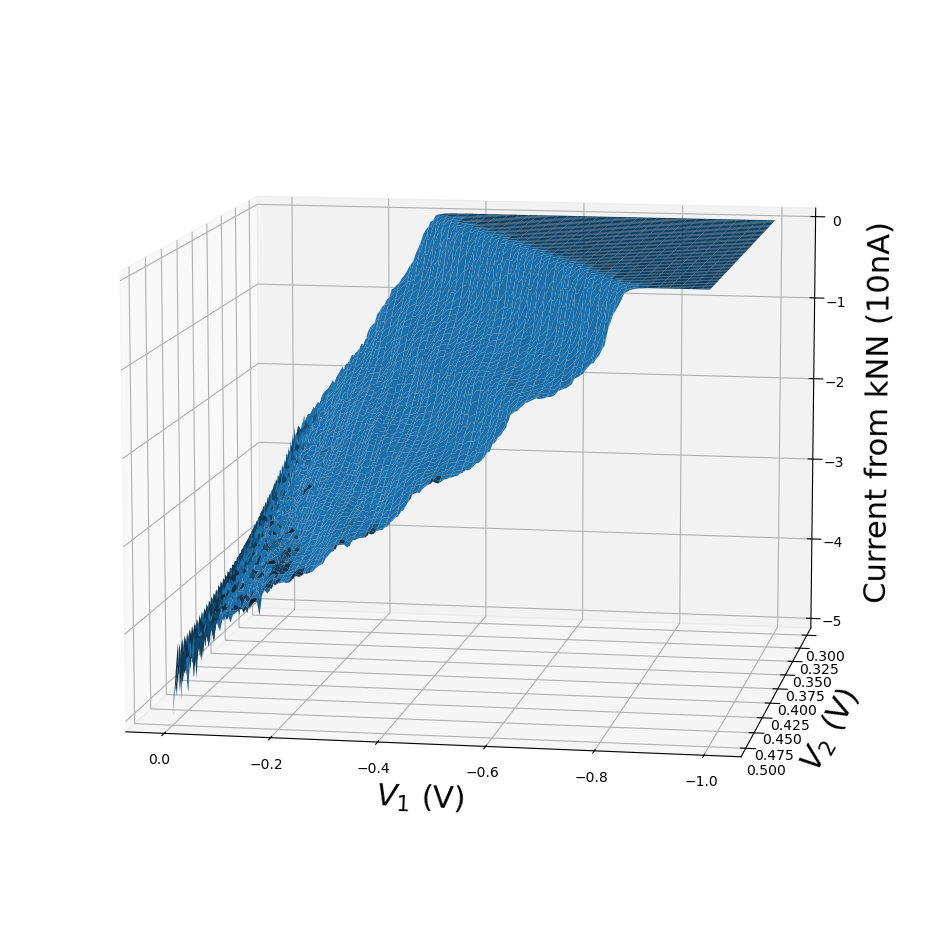

contour_rf
-5.015605186228882 0.0005479106687703398
-5.015605186228882 0.0005479106687703398


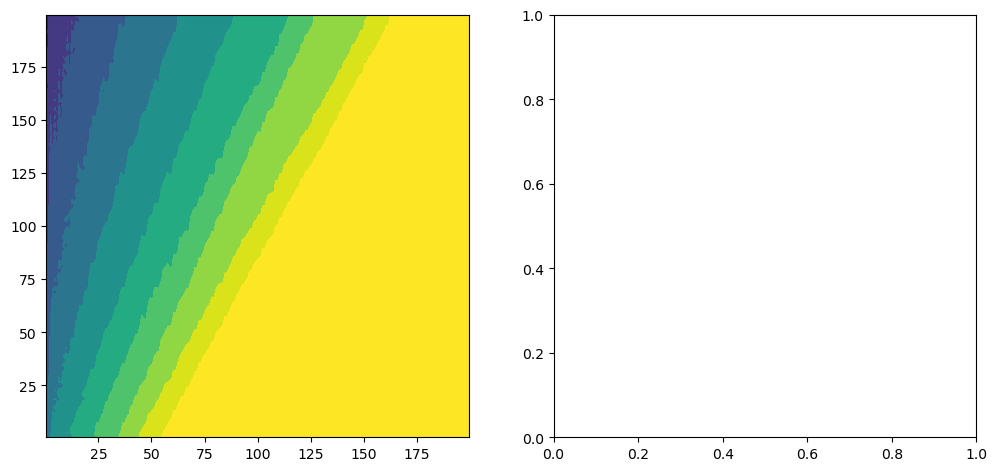

In [132]:
print('surface_kNN_0.3ts(nuarray[19, :, :]), default')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, nuarray[19, :, :])
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('Current from kNN (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_knn-nuarray_surface' + str() + '.pdf')
plt.show()
plt.close()

print('surface_kNN_0.3ts (nuarray[19, :, :]), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, nuarray[19, :, :])
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('Current from kNN (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_knn-nuarray_surface_10elev 100azim' + str() + '.pdf')
plt.show()
plt.close()

print('contour_rf')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
amax = np.max(nuarray[19, :, :])
amin = np.min(nuarray[19, :, :])
print(amin, amax)
tmz = (amax-amin)/10.
ax1.contourf(nuarray[19, :, :], levels=np.arange(amin, amax, tmz),
             extend='both', origin="lower")
amax = np.max(nuarray[19, :, :])
amin = np.min(nuarray[19, :, :])
print(amin, amax)
# tmz = (amax-amin)/10.
# ax2.contourf(st, levels=np.arange(amin, amax, tmz),
#              extend='both', origin="lower")
plt.savefig('fig_knn-nuarray_contour_' + str() + '.pdf')
# plt.show()
# plt.close()
# end = time.time()
# print(end - start, (end-start)/60.)

nuavexp[:3,:4]
[[-3.47363744 -3.28494301 -2.98706741 -2.80625193]
 [-3.46447981 -3.2870812  -3.0068978  -2.85451485]
 [-3.47548823 -3.32341339 -3.03298785 -2.85394236]]
surface_kNN_0.3ts (nuavexp), 10elev 100azim


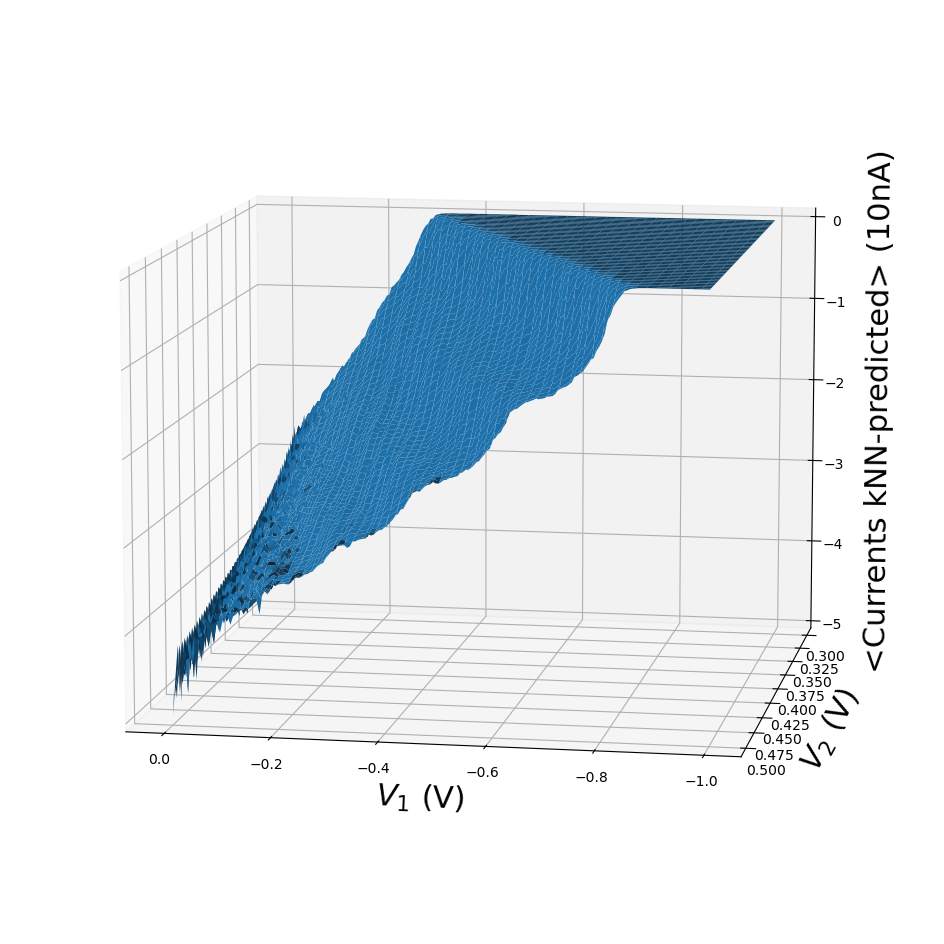

In [99]:
nuavexp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        nuavexp[i, j] = sum(nuarray[:, i, j])/20
print('nuavexp[:3,:4]')
print(nuavexp[:3,:4])

print('surface_kNN_0.3ts (nuavexp), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, nuavexp[:, :])
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('<Currents kNN-predicted> (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_nuavexp2_' + str() + '.pdf')
plt.show()
plt.close()

In [101]:
tmp = np.zeros((20, 200, 200))
for iexp in range(20):
    tmp[iexp, :, :] = ((nuarray[iexp, :, :]-zavgexpij[:, :]))**2
spm = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        spm[i, j] = np.sqrt(sum(tmp[:, i, j])/20)
print('nuarray[1, :3, :4]')
print(nuarray[1, :3, :4])
print('zavgexpij[:3, :4]')
print(zavgexpij[:3, :4])

nuarray[1, :3, :4]
[[-3.38768834 -3.20902842 -2.92328648 -2.74794519]
 [-3.37899262 -3.21113399 -2.94404395 -2.79550348]
 [-3.3846469  -3.24691303 -2.97015785 -2.79558202]]
zavgexpij[:3, :4]
[[-2.902238   -2.8651195  -2.82351857 -2.78178457]
 [-3.26702886 -3.18293471 -3.11441893 -3.05159057]
 [-3.27528229 -3.19609814 -3.12560057 -3.06005757]]


In [103]:
print('spm[:3, :4]')
print(spm[:3, :4])

spm[:3, :4]
[[0.57398069 0.42181817 0.16736405 0.04627779]
 [0.2027319  0.11191371 0.11303474 0.20054983]
 [0.20419203 0.13408015 0.0991581  0.20933773]]


standard deviation (spm), default


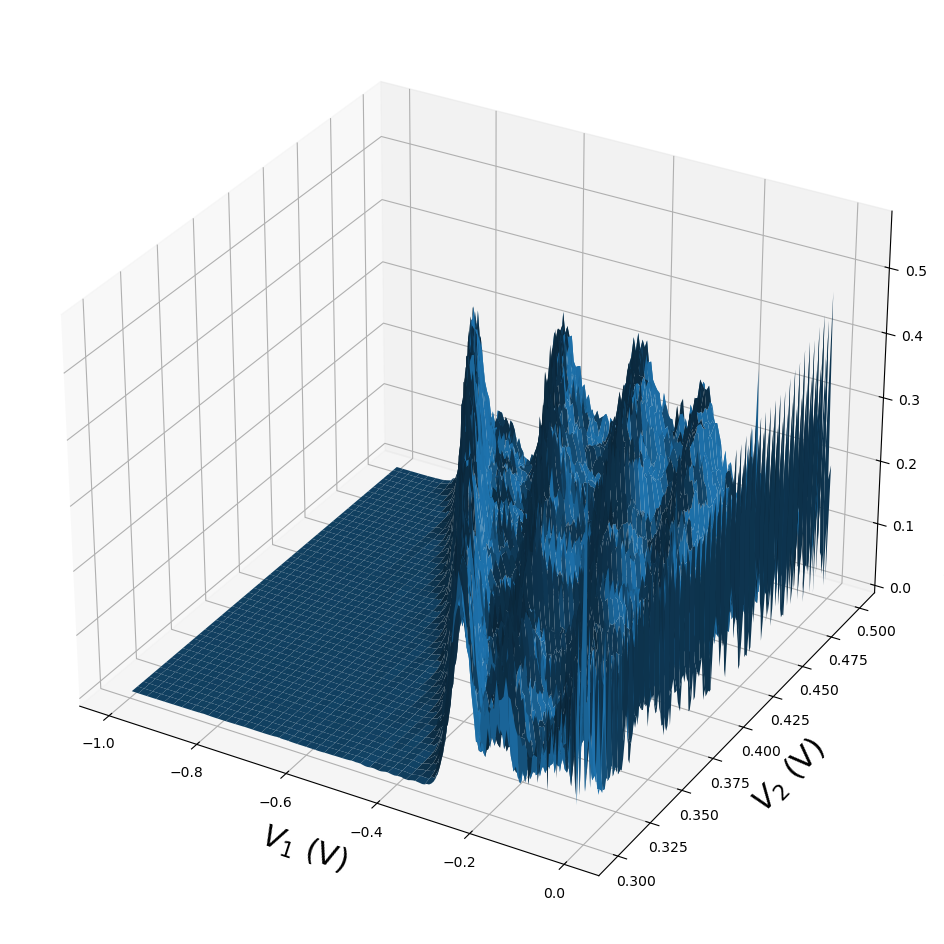

standard deviation (spm), 10elev 100azim


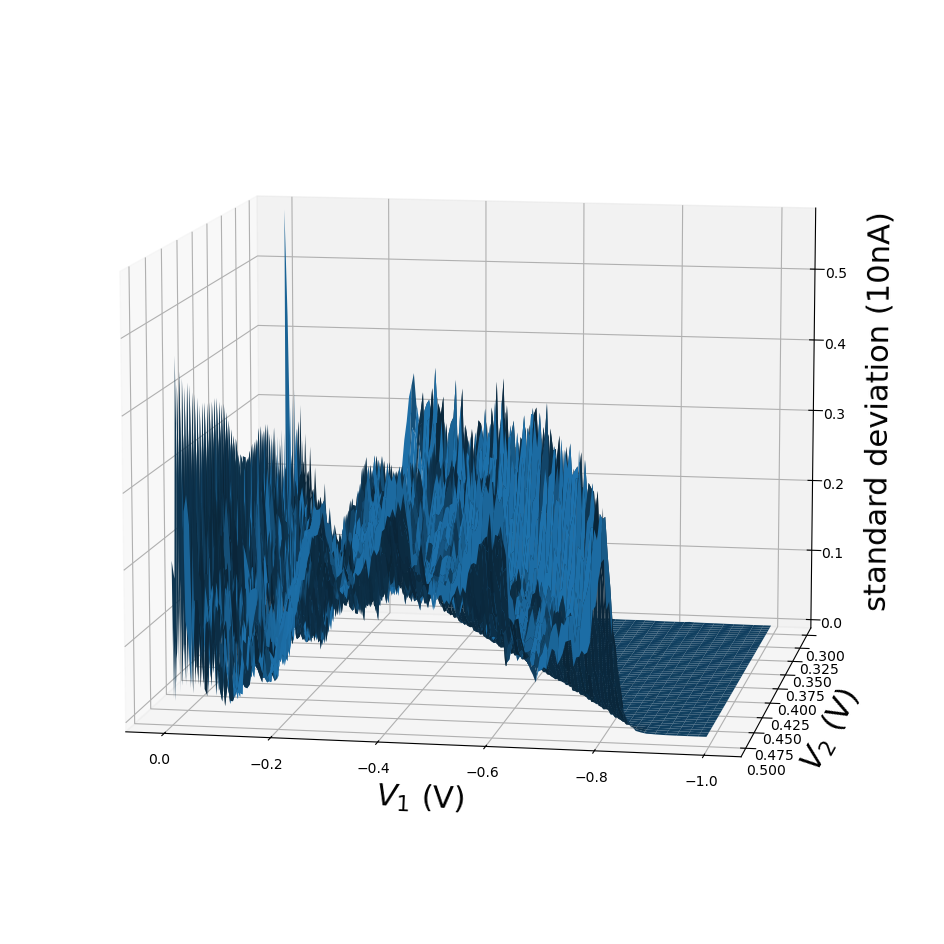

contour_rf(spm)
7.345666491955667e-06 0.5739806904161731
7.345666491955667e-06 0.5739806904161731


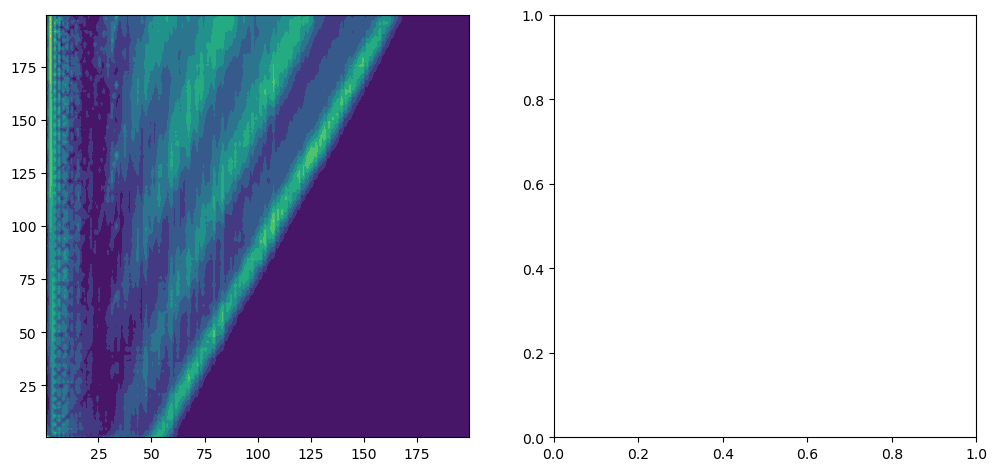

In [105]:
print('standard deviation (spm), default')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, spm)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_spm_' + str() + '.pdf')
plt.show()
plt.close()

print('standard deviation (spm), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, spm)
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_spm2_' + str() + '.pdf')
plt.show()
plt.close()


print('contour_rf(spm)')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
amax = np.max(spm)
amin = np.min(spm)
print(amin, amax)
tmz = (amax-amin)/10.
ax1.contourf(spm, levels=np.arange(amin, amax, tmz),
             extend='both', origin="lower")
amax = np.max(spm)
amin = np.min(spm)
print(amin, amax)
# tmz = (amax-amin)/10.
# ax2.contourf(st, levels=np.arange(amin, amax, tmz),
#              extend='both', origin="lower")
plt.savefig('fig_spm_contour_' + str(jter) + '.pdf')
# plt.show()
# plt.close()
# end = time.time()
# print(end - start, (end-start)/60.)

spp

In [110]:
nuarray = np.zeros((20, 200, 200))
#for iexp in range(nexp):
for jter in range(20):
    fname_accum = r'/Users/namkim/testAI/data_knn(ts=0.3)/accum_'+str(jter)+'.npy'
    with open(fname_accum, 'rb') as afile:  #저장된 방식에 따라서 오픈해야함
        nu = np.load(afile)
        st = np.load(afile)
        nuarray[jter, :, :] = nu[:, :]
print('nuarray[1, :3, :4]')
print(nuarray[1, :3, :4])
print('nuarray[2, :3, :4]')
print(nuarray[2, :3, :4])
print('nuarray[19, :3, :4]')
print(nuarray[19, :3, :4])

nuarray[1, :3, :4]
[[-3.38768834 -3.20902842 -2.92328648 -2.74794519]
 [-3.37899262 -3.21113399 -2.94404395 -2.79550348]
 [-3.3846469  -3.24691303 -2.97015785 -2.79558202]]
nuarray[2, :3, :4]
[[-3.39328047 -3.23753534 -2.96151595 -2.72789532]
 [-3.40547633 -3.23961994 -2.97497948 -2.78646137]
 [-3.46971927 -3.27091844 -3.00460043 -2.78743639]]
nuarray[19, :3, :4]
[[-3.54056686 -3.31530947 -3.00157317 -2.84945202]
 [-3.50572824 -3.31719674 -3.02292423 -2.89160265]
 [-3.49754173 -3.35488594 -3.04509836 -2.88950932]]


In [112]:
nuavexp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        nuavexp[i, j] = sum(nuarray[:, i, j])/20
print('nuavexp[:3,:4]')
print(nuavexp[:3,:4])

nuavexp[:3,:4]
[[-3.47363744 -3.28494301 -2.98706741 -2.80625193]
 [-3.46447981 -3.2870812  -3.0068978  -2.85451485]
 [-3.47548823 -3.32341339 -3.03298785 -2.85394236]]


In [114]:
tmp = np.zeros((20, 200, 200))
for iexp in range(20):
    tmp[iexp, :, :] = ((nuarray[iexp, :, :]-nuavexp[:, :]))**2
spp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        spp[i, j] = np.sqrt(sum(tmp[:, i, j])/20)
print('spp[ :3, :4]')
print(spp[ :3, :4])

spp[ :3, :4]
[[0.05437386 0.04097296 0.03553171 0.03928081]
 [0.04597114 0.04096572 0.03487207 0.03716712]
 [0.04014926 0.04205134 0.03542898 0.03658965]]


standard deviation (spp), default


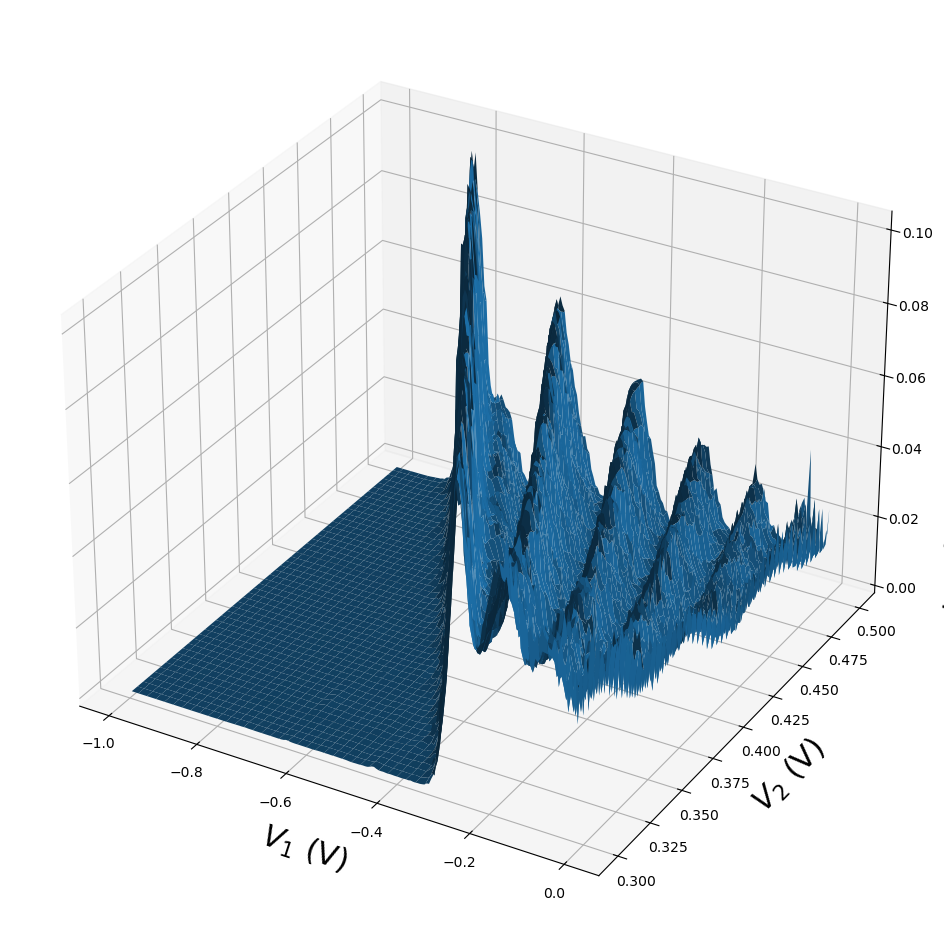

standard deviation (spp), 10elev 100azim


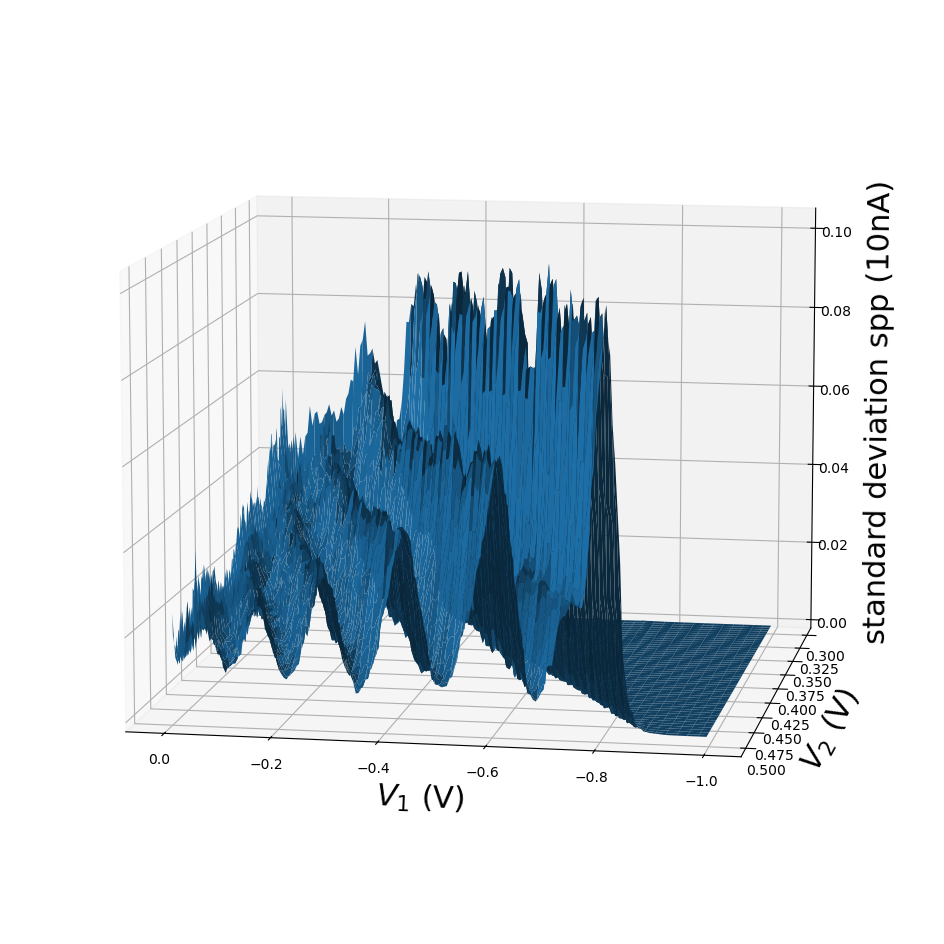

contour_rf(spp)
5.342353934133068e-06 0.10294785067102008
5.342353934133068e-06 0.10294785067102008


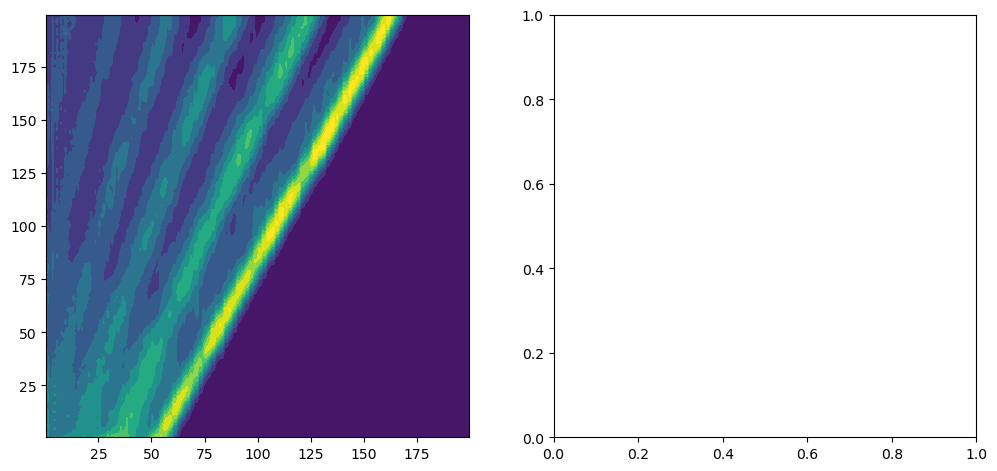

In [118]:
print('standard deviation (spp), default')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, spp)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation spp (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_spp_' + str() + '.pdf')
plt.show()
plt.close()

print('standard deviation (spp), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, spp)
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation spp (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_spp2_' + str() + '.pdf')
plt.show()
plt.close()


print('contour_rf(spp)')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
amax = np.max(spp)
amin = np.min(spp)
print(amin, amax)
tmz = (amax-amin)/10.
ax1.contourf(spp, levels=np.arange(amin, amax, tmz),
             extend='both', origin="lower")
amax = np.max(spp)
amin = np.min(spp)
print(amin, amax)
# tmz = (amax-amin)/10.
# ax2.contourf(st, levels=np.arange(amin, amax, tmz),
#              extend='both', origin="lower")
plt.savefig('fig_spp_contour_' + str() + '.pdf')
# plt.show()
# plt.close()
# end = time.time()
# print(end - start, (end-start)/60.)

deltaI

In [122]:
deltaI = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        deltaI[ :, :] = (nuavexp[ :, :]-zavgexpij[:, :])

print('nuavexp[:3, :4]')
print(nuavexp[:3, :4])
print('zavgexpij[:3, :4]')
print(zavgexpij[:3, :4])
print('deltaI[:3, :4]')
print(deltaI[:3, :4])


nuavexp[:3, :4]
[[-3.47363744 -3.28494301 -2.98706741 -2.80625193]
 [-3.46447981 -3.2870812  -3.0068978  -2.85451485]
 [-3.47548823 -3.32341339 -3.03298785 -2.85394236]]
zavgexpij[:3, :4]
[[-2.902238   -2.8651195  -2.82351857 -2.78178457]
 [-3.26702886 -3.18293471 -3.11441893 -3.05159057]
 [-3.27528229 -3.19609814 -3.12560057 -3.06005757]]
deltaI[:3, :4]
[[-0.57139944 -0.41982351 -0.16354884 -0.02446735]
 [-0.19745095 -0.10414648  0.10752112  0.19707573]
 [-0.20020595 -0.12731524  0.09261272  0.20611521]]


deltaI, default


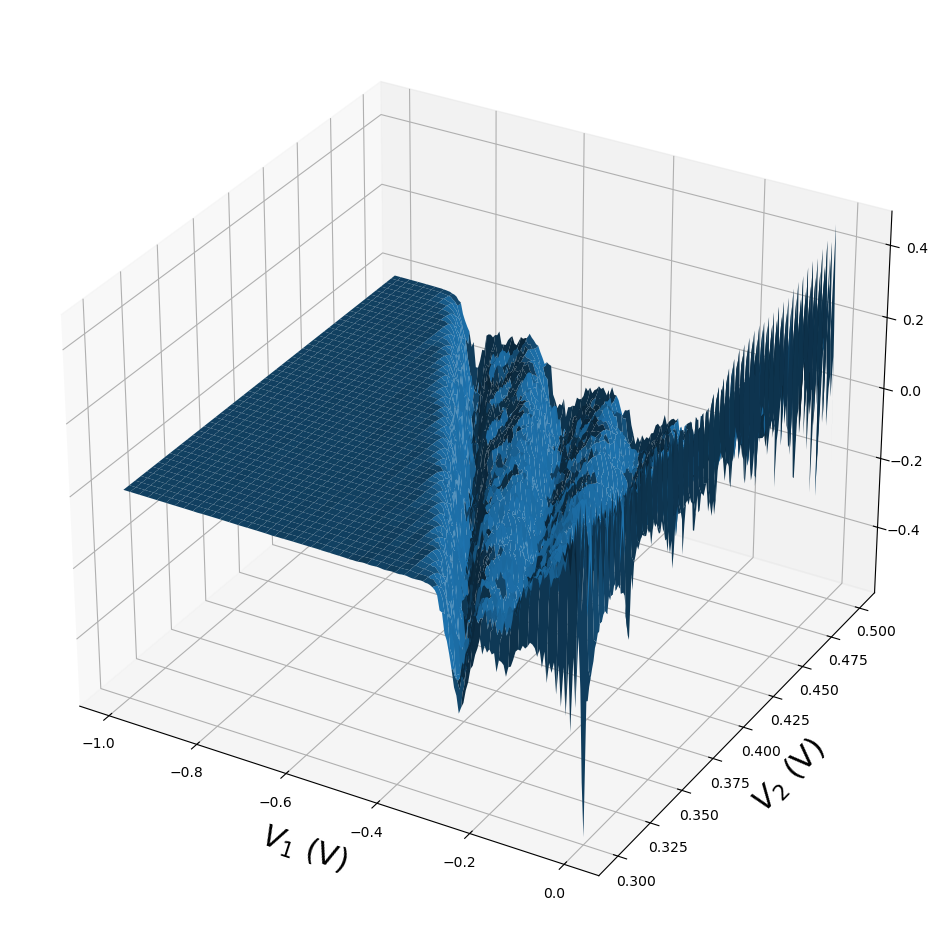

deltaI, 10elev 100azim


contour_rf(spp)
-0.5713994364999997 0.47188583133491324
-0.5713994364999997 0.47188583133491324


In [126]:
print('deltaI, default')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, deltaI)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('deltaI (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_deltaI_' + str() + '.pdf')
plt.show()
plt.close()

print('deltaI, 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, deltaI)
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('deltaI (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_deltaI2_' + str() + '.pdf')
plt.show()
plt.close()


print('contour_rf(spp)')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
amax = np.max(deltaI)
amin = np.min(deltaI)
print(amin, amax)
tmz = (amax-amin)/10.
ax1.contourf(deltaI, levels=np.arange(amin, amax, tmz),
             extend='both', origin="lower")
amax = np.max(deltaI)
amin = np.min(deltaI)
print(amin, amax)
# tmz = (amax-amin)/10.
# ax2.contourf(st, levels=np.arange(amin, amax, tmz),
#              extend='both', origin="lower")
plt.savefig('fig_deltaI_contour_' + str() + '.pdf')
# plt.show()
# plt.close()
# end = time.time()
# print(end - start, (end-start)/60.)

selected plot

Excercise array & examples

In [1]:
# Define the values and probabilities
values = [1, 2, 3, 4, 5, 6]
probability = 1/6  # Equal probability for each face

# Calculate mean
mean = sum(x * probability for x in values)

# Calculate variance
# Variance = Σ(x - μ)²p(x)
variance = sum((x - mean)**2 * probability for x in values)

# Calculate standard deviation
# Standard deviation is the square root of variance
std_dev = variance ** 0.5

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")

Mean: 3.5
Variance: 2.9166666666666665
Standard Deviation: 1.707825127659933


In [27]:
import numpy as np  # Added numpy import which was missing

# Since fname_accum is a list, not a file name, we need to modify the data reading part
# Option 1: If you want to work with the list directly
fname_accum = [1, 2, 3, 4, 5, 6, 7, 8, 9]
probability = 1/9

# Convert the list directly to arrays
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # Example data
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # Example data
z = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # Example data


# Create the 3x3 matrices
xx = np.zeros((3, 3))
yy = np.zeros((3, 3))
zz = np.zeros((3, 3))

# Fill the matrices
k = 0
for i in range(3):
    for j in range(3):
        xx[i, j] = x[k]
        yy[i, j] = y[k]
        zz[i, j] = z[k]
        k = k + 1

print("xx matrix:")
print(xx)
print("\nyy matrix:")
print(yy)
print("\nzz matrix:")
print(zz)
# xxx = np.zeros((3, 3, 3))
# yyy = np.zeros((3, 3, 3))
# zzz = np.zeros((3, 3, 3))
xyz = np.zeros((3, 3, 3))
for jter in range(3):
    xyz[jter, :, :] = xx[:, :]
    xyz[jter, :, :] = yy[:, :]
    xyz[jter, :, :] = zz[:, :]
print("xyz matrix:")
print(xyz)

xx matrix:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

yy matrix:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

zz matrix:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
xyz matrix:
[[[1. 2. 3.]
  [4. 5. 6.]
  [7. 8. 9.]]

 [[1. 2. 3.]
  [4. 5. 6.]
  [7. 8. 9.]]

 [[1. 2. 3.]
  [4. 5. 6.]
  [7. 8. 9.]]]
